In [1]:
import requests
import pandas as pd
import json
from bokeh.plotting import figure, output_notebook, show, save, output_file
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import ccf
from statsmodels.tsa.arima_model import ARIMA
from scipy.signal import lfilter
from scipy import stats
from statsmodels.graphics.api import qqplot

%matplotlib inline

C:\Users\Chris\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
r = requests.get('https://www.openhumans.org/api/public-data/?source=fitbit')

In [2]:
with open('fitbit-data-2.json') as json_data:        #open the downloaded json file
    fit_data_0 = json.load(json_data)
    

In [3]:
fit_data_0.keys()

dict_keys(['profile', 'tracker-calories', 'tracker-activity-calories', 'heart', 'sleep-efficiency', 'awake-minutes', 'tracker-minutes-lightly-active', 'tracker-minutes-fairly-active', 'weight-log', 'activities-overview', 'weight', 'tracker-minutes-very-active', 'sleep-minutes-after-wakeup', 'tracker-steps', 'tracker-floors', 'minutes-to-sleep', 'time-in-bed', 'sleep-start-time', 'sleep-minutes', 'tracker-elevation', 'sleep-awakenings', 'tracker-minutes-sedentary', 'tracker-distance'])

In [4]:
fit_data_0['profile']

{'averageDailySteps': 13528,
 'encodedId': '29VSFS',
 'height': 66.02362204724409,
 'memberSince': '2013-12-27',
 'strideLengthRunning': 33.22834645669291,
 'strideLengthWalking': 27.283464566929133,
 'weight': 149.6}

# Data for Weight and Minutes active

Get data for years 2014 through 2017 for activity

In [6]:


min_light_active_2014 = pd.DataFrame(fit_data_0['tracker-minutes-lightly-active']['2014']['activities-tracker-minutesLightlyActive'])
min_light_active_2014['dateTime'] = pd.to_datetime(min_light_active_2014['dateTime'])
min_light_active_2014.columns = ['date','light_minutes']
min_light_active_2015 = pd.DataFrame(fit_data_0['tracker-minutes-lightly-active']['2015']['activities-tracker-minutesLightlyActive'])
min_light_active_2015['dateTime'] = pd.to_datetime(min_light_active_2015['dateTime'])
min_light_active_2015.columns = ['date','light_minutes']
min_light_active_2016 = pd.DataFrame(fit_data_0['tracker-minutes-lightly-active']['2016']['activities-tracker-minutesLightlyActive'])
min_light_active_2016['dateTime'] = pd.to_datetime(min_light_active_2016['dateTime'])
min_light_active_2016.columns = ['date','light_minutes']
min_light_active_2017 = pd.DataFrame(fit_data_0['tracker-minutes-lightly-active']['2017']['activities-tracker-minutesLightlyActive'])
min_light_active_2017['dateTime'] = pd.to_datetime(min_light_active_2017['dateTime'])
min_light_active_2017.columns = ['date','light_minutes']

concatenate to make one DataFrame for lighly active minutes 

In [7]:
min_light_active = pd.concat([min_light_active_2014,min_light_active_2015,min_light_active_2016,min_light_active_2017])
#min_light_active = min_light_active.set_index('date')
min_light_active['light_minutes'] = min_light_active['light_minutes'].astype(int)



Repeat steps for fairly active minutes

In [8]:

min_fairly_active_2014 = pd.DataFrame(fit_data_0['tracker-minutes-fairly-active']['2014']['activities-tracker-minutesFairlyActive'])
min_fairly_active_2014['dateTime'] = pd.to_datetime(min_fairly_active_2014['dateTime'])
min_fairly_active_2014.columns = ['date','fair_minutes']
min_fairly_active_2015 = pd.DataFrame(fit_data_0['tracker-minutes-fairly-active']['2015']['activities-tracker-minutesFairlyActive'])
min_fairly_active_2015['dateTime'] = pd.to_datetime(min_fairly_active_2015['dateTime'])
min_fairly_active_2015.columns = ['date','fair_minutes']
min_fairly_active_2016 = pd.DataFrame(fit_data_0['tracker-minutes-fairly-active']['2016']['activities-tracker-minutesFairlyActive'])
min_fairly_active_2016['dateTime'] = pd.to_datetime(min_fairly_active_2016['dateTime'])
min_fairly_active_2016.columns = ['date','fair_minutes']
min_fairly_active_2017 = pd.DataFrame(fit_data_0['tracker-minutes-fairly-active']['2017']['activities-tracker-minutesFairlyActive'])
min_fairly_active_2017['dateTime'] = pd.to_datetime(min_fairly_active_2017['dateTime'])
min_fairly_active_2017.columns = ['date','fair_minutes']


In [9]:
min_fairly_active = pd.concat([min_fairly_active_2014,min_fairly_active_2015,min_fairly_active_2016,min_fairly_active_2017])
#min_fairly_active = min_fairly_active.set_index('date')
min_fairly_active['fair_minutes'] = min_fairly_active['fair_minutes'].astype(int)
min_fairly_active = min_fairly_active.drop('date',axis=1)





Repeat steps for very active minutes

In [10]:


min_very_active_2014 = pd.DataFrame(fit_data_0['tracker-minutes-very-active']['2014']['activities-tracker-minutesVeryActive'])
min_very_active_2014['dateTime'] = pd.to_datetime(min_very_active_2014['dateTime'])
min_very_active_2014.columns = ['date','very_minutes']
min_very_active_2015 = pd.DataFrame(fit_data_0['tracker-minutes-very-active']['2015']['activities-tracker-minutesVeryActive'])
min_very_active_2015['dateTime'] = pd.to_datetime(min_very_active_2015['dateTime'])
min_very_active_2015.columns = ['date','very_minutes']
min_very_active_2016 = pd.DataFrame(fit_data_0['tracker-minutes-very-active']['2016']['activities-tracker-minutesVeryActive'])
min_very_active_2016['dateTime'] = pd.to_datetime(min_very_active_2016['dateTime'])
min_very_active_2016.columns = ['date','very_minutes']
min_very_active_2017 = pd.DataFrame(fit_data_0['tracker-minutes-very-active']['2017']['activities-tracker-minutesVeryActive'])
min_very_active_2017['dateTime'] = pd.to_datetime(min_very_active_2017['dateTime'])
min_very_active_2017.columns = ['date','very_minutes']

In [11]:
min_very_active = pd.concat([min_very_active_2014,min_very_active_2015,min_very_active_2016,min_very_active_2017])
#min_very_active = min_very_active.set_index('date')
min_very_active['very_minutes'] = min_very_active['very_minutes'].astype(int)
min_very_active = min_very_active.drop('date',axis=1)


Combine all above minutes, make new colum for Total active minutes and a ratio. Set index to datetime

In [12]:
min_active_total = pd.concat([min_light_active, min_fairly_active, min_very_active], axis=1)
min_active_total['Total_minutes'] = min_active_total['light_minutes']+min_active_total['fair_minutes']+min_active_total['very_minutes']
min_active_total['Percent Very Active'] = (min_active_total['very_minutes']/min_active_total['Total_minutes'])


In [13]:
min_active_total['Total_minutes'] = min_active_total['Total_minutes'].astype('int')
min_active_total['Total_minutes'] = min_active_total['Total_minutes'].replace(0, min_active_total['Total_minutes'].mean())

In [14]:
min_active_total = min_active_total.reset_index(drop=True)
min_active_total_red = min_active_total.loc[0:1436]

In [15]:
min_active_total_date = min_active_total_red.set_index('date')
min_active_total_date

,light_minutes,fair_minutes,very_minutes,Total_minutes,Percent Very Active
date,,,,,
2014-01-01,165,94,55,314.0,0.175159
2014-01-02,199,38,3,240.0,0.012500
2014-01-03,122,35,1,158.0,0.006329
2014-01-04,188,134,105,427.0,0.245902
2014-01-05,150,25,3,178.0,0.016854
2014-01-06,147,25,0,172.0,0.000000
2014-01-07,345,29,1,375.0,0.002667
2014-01-08,143,89,13,245.0,0.053061
2014-01-09,187,123,28,338.0,0.082840


Lag plot for time series data of total minutes. Also Autocorrelation plot for total minutes data

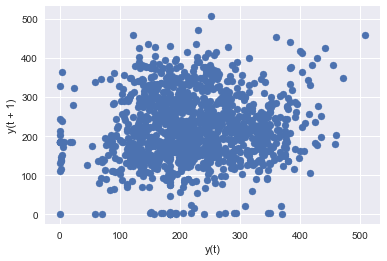

In [16]:
from pandas.plotting import lag_plot
lag_plot(min_active_total_date['Total_minutes'])
plt.show()

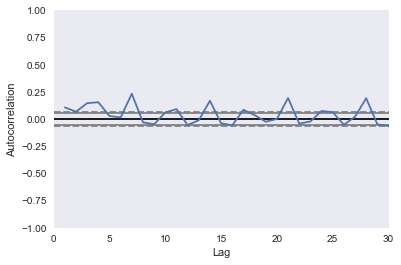

In [17]:


from pandas.plotting import autocorrelation_plot
autocorrelation_plot(min_active_total_date['Total_minutes'])
plt.xlim(0,30)
plt.show()

# Get weight data into a DataFrame. Will treat the problem initially in terms of supervised learning

In [19]:
weight_2014 = pd.DataFrame(fit_data_0['weight']['2014']['body-weight'])
weight_2014['dateTime'] = pd.to_datetime(weight_2014['dateTime'])
weight_2014.columns = ['date','weight']
weight_2015 = pd.DataFrame(fit_data_0['weight']['2015']['body-weight'])
weight_2015['dateTime'] = pd.to_datetime(weight_2015['dateTime'])
weight_2015.columns = ['date','weight']
weight_2016 = pd.DataFrame(fit_data_0['weight']['2016']['body-weight'])
weight_2016['dateTime'] = pd.to_datetime(weight_2016['dateTime'])
weight_2016.columns = ['date','weight']
weight_2017 = pd.DataFrame(fit_data_0['weight']['2017']['body-weight'])
weight_2017['dateTime'] = pd.to_datetime(weight_2017['dateTime'])
weight_2017.columns = ['date','weight']


In [20]:
df_weight = pd.concat([weight_2014,weight_2015,weight_2016,weight_2017])
df_weight['weight'] = df_weight['weight'].astype(float)
df_weight = df_weight.reset_index(drop=True)
df_weight_red = df_weight[:1440]
df_weight_red_date = df_weight_red.set_index('date')



In [22]:
df_weight_new = df_weight_red_date

In [23]:
df_weight_new['shifted_weight'] = df_weight_new['weight'].shift(-1)

In [24]:
df_weight_new = df_weight_new.dropna()

In [25]:
X = df_weight_new['weight'].values.reshape(-1,1)
y = df_weight_new['shifted_weight'].values.reshape(-1,1).ravel()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [27]:
size = int(len(X)*0.66)

In [28]:
X_train = X[:size]
X_test = X[size:]
y_train = y[:size]
y_test = y[size:]

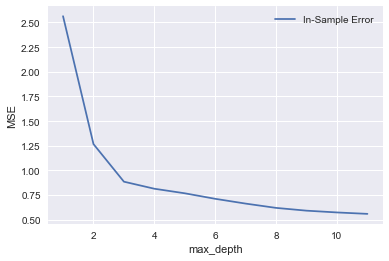

In [31]:
from sklearn import metrics

max_depths = range(1, 12)
in_sample_errors = []
for max_depth in max_depths:
    y_pred = RandomForestRegressor(max_depth=max_depth).fit(X, y).predict(X)
    in_sample_errors.append(metrics.mean_squared_error(y, y_pred))
    
plt.plot(max_depths, in_sample_errors, label='In-Sample Error')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.legend(loc='upper right')

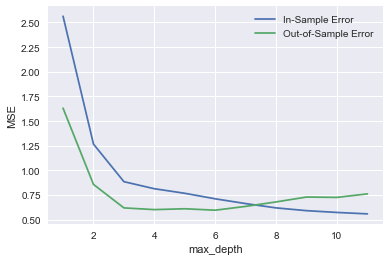

In [44]:
test_errors = []
for max_depth in max_depths:
    est = RandomForestRegressor(max_depth=max_depth).fit(X_train, y_train)
    y_pred = est.predict(X_test)
    test_errors.append(metrics.mean_squared_error(y_test, y_pred))

plt.plot(max_depths, in_sample_errors, label='In-Sample Error')
plt.plot(max_depths, test_errors, label='Out-of-Sample Error')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.legend(loc='upper right')
plt.savefig('Error_2.png')

In [39]:
best  = RandomForestRegressor(max_depth=7)
best.fit(X_train,y_train)
pred = best.predict(X_test)

In [40]:
d = {'predictions': pred, 'test': y_test}

In [41]:
df_results = pd.DataFrame(data=d)

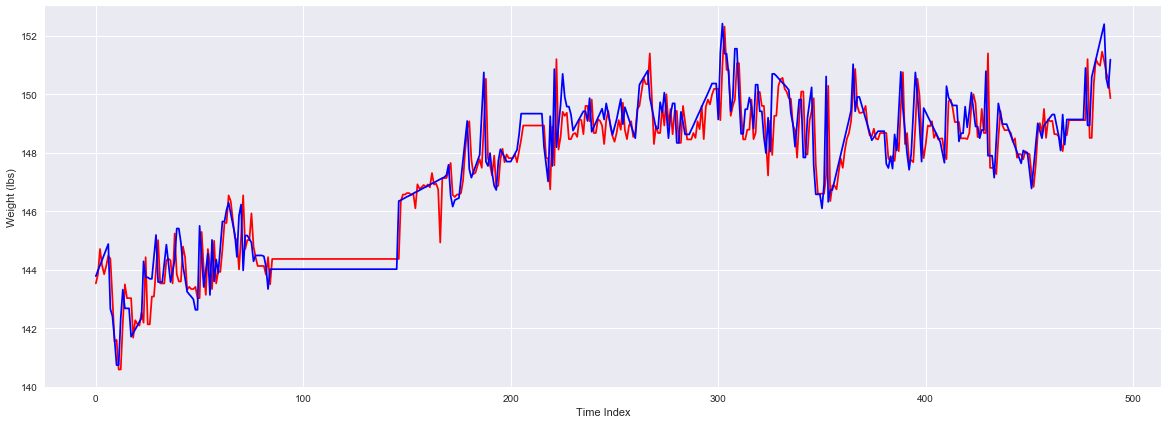

In [43]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(df_results.index,df_results['predictions'],'r')
plot2 = ax1.plot(df_results.index,df_results['test'], 'blue')
plt.xlabel("Time Index")
plt.ylabel('Weight (lbs)')
plt.savefig('RF_2.png')
plt.show()

# Get information about Body Fat, which is embedded in the weight data. Also information about Weight autocorrelation


In [21]:
df_weight = pd.DataFrame()
for key in fit_data_0['weight-log']:
    data = pd.DataFrame(fit_data_0['weight-log'][key]['weight'])
    df_weight = df_weight.append(data)

In [22]:
df_weight['date']= pd.to_datetime(df_weight['date'])

In [23]:
df_weight = df_weight.sort_values(by='date')
df_weight = df_weight.drop_duplicates(subset='date', keep='last')
df_weight = df_weight.reset_index(drop=True)

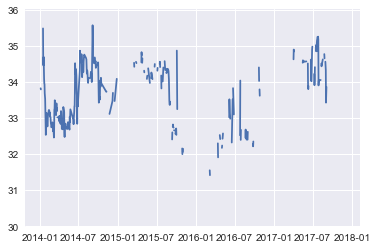

In [24]:
plt.plot(df_weight['date'],df_weight['fat'])
plt.show()

In [25]:
df_weight['fat'] = df_weight['fat'].fillna(df_weight['fat'].mean())
df_weight_new = df_weight.loc[0:220]

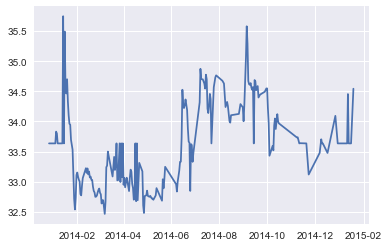

In [26]:

#df_weight_red = df_weight_red.reset_index(drop=True)
#df_weight_red_date = df_weight_red.set_index('date')
#df_weight_red_date = df_weight_red_date.drop(['fat','source'],axis=1)
#df_weight_red_date
plt.plot(df_weight_new['date'],df_weight_new['fat'])
plt.show()

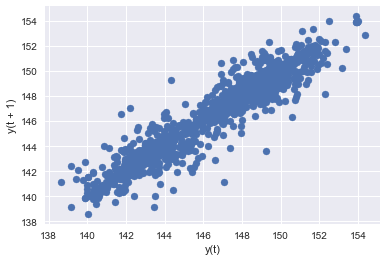

In [27]:
#Lag plot for weight data 

lag_plot(df_weight_red_date['weight'])
plt.show()

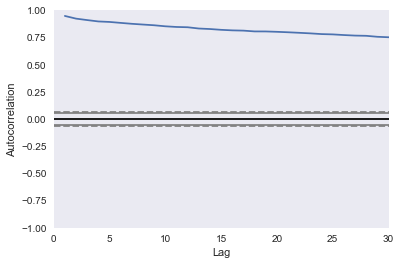

In [28]:
#Autocorrelation for weight data

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_weight_red_date['weight'])
plt.xlim(0,30)
plt.show()

# Combine weight and activity data into one DataFrame

In [55]:
df_weight_active = pd.concat([df_weight_red_date,min_active_total_date],axis=1)
df_weight_active = df_weight_active.dropna()

df_weight_active['Total_minutes'] = df_weight_active['Total_minutes'].replace(0, df_weight_active['Total_minutes'].mean())

Calculate rolling averages for a 14 day period to smooth out the time series

In [56]:


df_weight_active['Rolling Avg Activity'] = df_weight_active['Total_minutes'].rolling(window=14).mean()
df_weight_active['Rolling Avg Weight'] = df_weight_active['weight'].rolling(window=14).mean()
#df_weight_active['Rolling Std Activity'] = df_weight_active['Total_minutes'].rolling(window=30).std()

Plots of data and the rolling averages

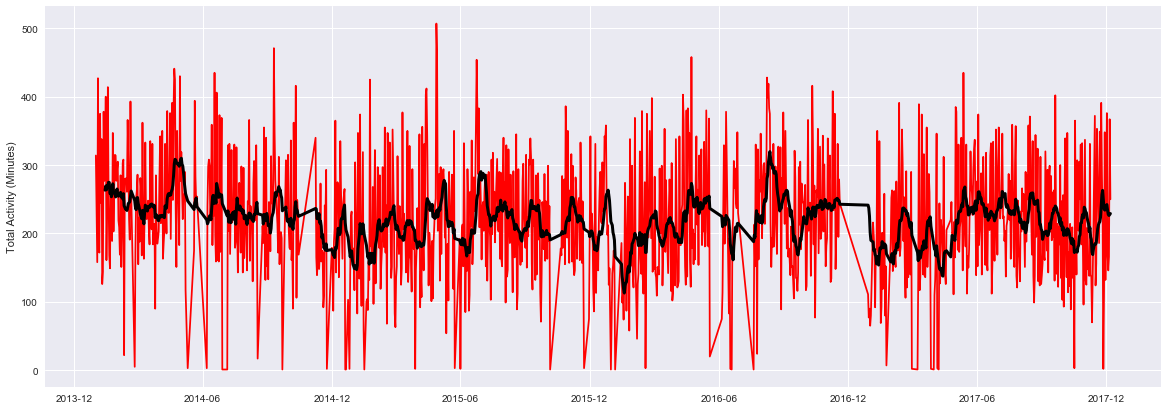

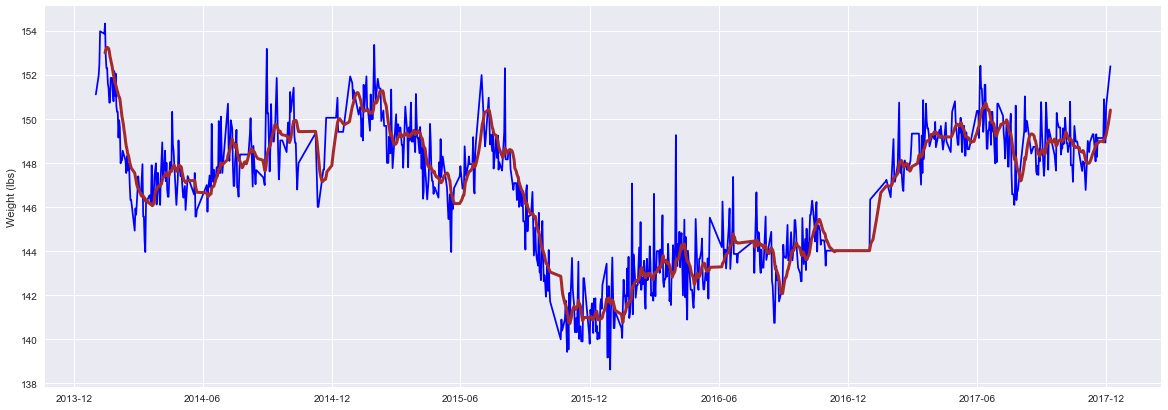

In [57]:


fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(df_weight_active.index,df_weight_active['Total_minutes'],'r')
plot2 = ax1.plot(df_weight_active.index,df_weight_active['Rolling Avg Activity'], 'black',linewidth=3.0)
#plot2a = ax1.plot(df_weight_active.index,df_weight_active['Rolling Std Activity'], 'green',linewidth=3.0)
plt.ylabel('Total Activity (Minutes)')
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(df_weight_active.index,df_weight_active['weight'],'b')
plot4 = ax2.plot(df_weight_active.index,df_weight_active['Rolling Avg Weight'], 'brown',linewidth=3.0)
plt.ylabel('Weight (lbs)')


Cross Correlation between total activity and weight, with various time lags 

In [58]:


for i in range(-7,8,1):
    print('shift day:', i, df_weight_active['Rolling Avg Weight'].corr(df_weight_active['Rolling Avg Activity'].shift(i)))

shift day: -7 0.0885143110255
shift day: -6 0.0885460699796
shift day: -5 0.0880362389821
shift day: -4 0.0862422745314
shift day: -3 0.0836080139384
shift day: -2 0.0798615890365
shift day: -1 0.076217797659
shift day: 0 0.071725238745
shift day: 1 0.0641716072769
shift day: 2 0.056743705692
shift day: 3 0.0492737526818
shift day: 4 0.0418914448587
shift day: 5 0.0345893226432
shift day: 6 0.0270761916892
shift day: 7 0.0192836601312


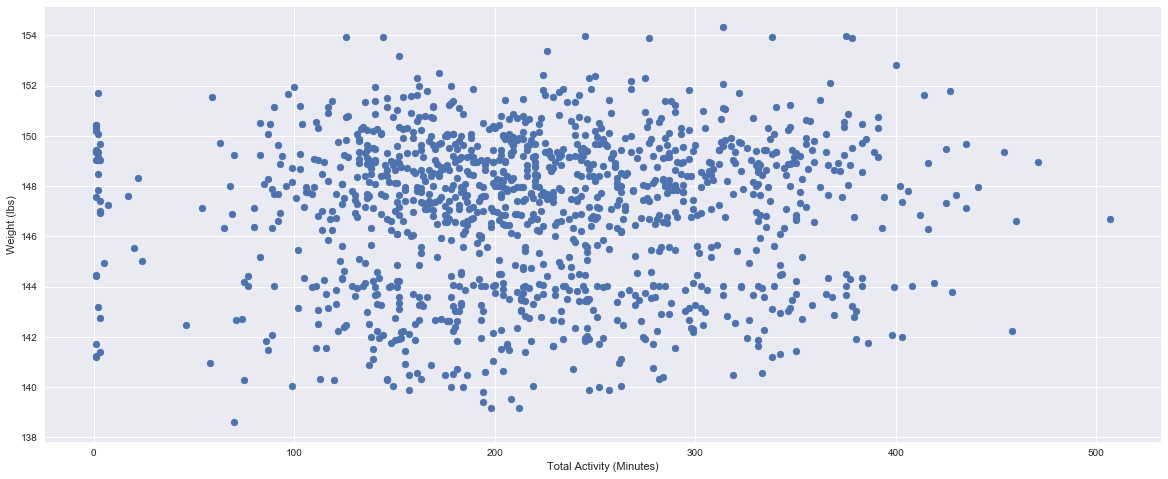

In [59]:
#Plot of Avg Weights versus Avg Activity.


plt.figure(2,figsize=(20,8))
plt.scatter(df_weight_active['Total_minutes'],df_weight_active['weight'])
plt.xlabel('Total Activity (Minutes)')
plt.ylabel('Weight (lbs)')
plt.savefig('WeightvActivity.png')
    

# Weight and Data about Calories 

Same procedure of taking data for calories and putting it together into a larger DataFrame 

In [62]:
tracker_cal_2014 = pd.DataFrame(fit_data_0['tracker-calories']['2014']['activities-tracker-calories'])
tracker_cal_2014['dateTime'] = pd.to_datetime(tracker_cal_2014['dateTime'])
tracker_cal_2014.columns = ['date','Tracker_Calories']
tracker_cal_2015 = pd.DataFrame(fit_data_0['tracker-calories']['2015']['activities-tracker-calories'])
tracker_cal_2015['dateTime'] = pd.to_datetime(tracker_cal_2015['dateTime'])
tracker_cal_2015.columns = ['date','Tracker_Calories']
tracker_cal_2016 = pd.DataFrame(fit_data_0['tracker-calories']['2016']['activities-tracker-calories'])
tracker_cal_2016['dateTime'] = pd.to_datetime(tracker_cal_2016['dateTime'])
tracker_cal_2016.columns = ['date','Tracker_Calories']
tracker_cal_2017 = pd.DataFrame(fit_data_0['tracker-calories']['2017']['activities-tracker-calories'])
tracker_cal_2017['dateTime'] = pd.to_datetime(tracker_cal_2017['dateTime'])
tracker_cal_2017.columns = ['date','Tracker_Calories']

In [63]:
tracker_calories = pd.concat([tracker_cal_2014,tracker_cal_2015,tracker_cal_2016,tracker_cal_2017])
tracker_calories['Tracker_Calories'] = tracker_calories['Tracker_Calories'].astype(int)
tracker_calories = tracker_calories.reset_index(drop=True)


In [64]:
tracker_act_cal_2014 = pd.DataFrame(fit_data_0['tracker-activity-calories']['2014']['activities-tracker-activityCalories'])
tracker_act_cal_2014['dateTime'] = pd.to_datetime(tracker_act_cal_2014['dateTime'])
tracker_act_cal_2014.columns = ['date','tracker_act_calories']
tracker_act_cal_2015 = pd.DataFrame(fit_data_0['tracker-activity-calories']['2015']['activities-tracker-activityCalories'])
tracker_act_cal_2015['dateTime'] = pd.to_datetime(tracker_act_cal_2015['dateTime'])
tracker_act_cal_2015.columns = ['date','tracker_act_calories']
tracker_act_cal_2016 = pd.DataFrame(fit_data_0['tracker-activity-calories']['2016']['activities-tracker-activityCalories'])
tracker_act_cal_2016['dateTime'] = pd.to_datetime(tracker_act_cal_2016['dateTime'])
tracker_act_cal_2016.columns = ['date','tracker_act_calories']
    
    
    
    

In [65]:
tracker_act_calories = pd.concat([tracker_act_cal_2014,tracker_act_cal_2015,tracker_act_cal_2016])
tracker_act_calories['tracker_act_calories'] = tracker_act_calories['tracker_act_calories'].astype(int)
tracker_act_calories['tracker_act_calories'] = tracker_act_calories['tracker_act_calories'].replace(0,
                                                                tracker_act_calories['tracker_act_calories'].mean())

tracker_act_calories = tracker_act_calories.reset_index(drop=True)
tracker_act_calories = tracker_act_calories.drop('date', axis=1)

Combine data and Define new columns for a ratio of activity calories to total calories taken in

Also excess calories = total - activity calories

In [66]:


total_calories = pd.concat([tracker_act_calories,tracker_calories],axis=1)
total_calories['Ratio'] = total_calories['tracker_act_calories']/total_calories['Tracker_Calories']
total_calories['Excess'] = total_calories['Tracker_Calories']-total_calories['tracker_act_calories']
total_calories_date = total_calories.set_index('date')


In [67]:
total_calories_weight = pd.concat([total_calories_date,df_weight_red_date], axis=1)


In [68]:
total_calories_weight = total_calories_weight.dropna()
total_calories_weight['2014-11-01':'2015-01-01']

,tracker_act_calories,Tracker_Calories,Ratio,Excess,weight
date,,,,,
2014-11-01,530.260036,1706,0.310821,1175.739964,148.93
2014-11-02,530.260036,1209,0.438594,678.739964,148.99
2014-11-03,530.260036,1706,0.310821,1175.739964,149.05
2014-11-04,530.260036,1707,0.310639,1176.739964,149.10
2014-11-05,530.260036,1707,0.310639,1176.739964,149.16
2014-11-06,530.260036,1707,0.310639,1176.739964,149.22
2014-11-07,530.260036,1706,0.310821,1175.739964,149.27
2014-11-08,1222.000000,2153,0.567580,931.000000,149.36
2014-11-09,531.000000,1597,0.332498,1066.000000,148.21


In [69]:
total_calories_weight['Rolling Avg Ratio'] = total_calories_weight['Ratio'].rolling(window=7).mean()
total_calories_weight['Rolling Avg Weight'] = total_calories_weight['weight'].rolling(window=7).mean()
#total_calories_weight['Rolling Std Ratio'] = total_calories_weight['Ratio'].rolling(window=30).std()

(735234.0, 736283.0)

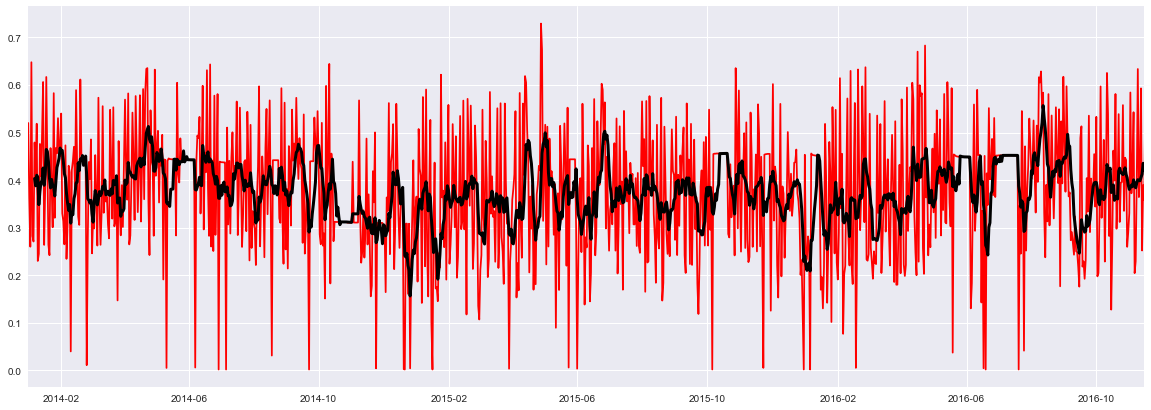

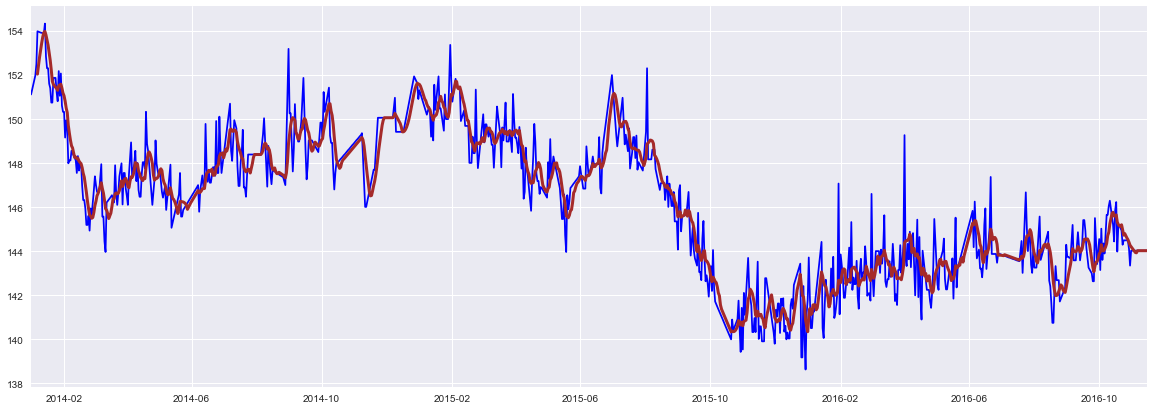

In [70]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(total_calories_weight.index,total_calories_weight['Ratio'],'r')
plot2 = ax1.plot(total_calories_weight.index,total_calories_weight['Rolling Avg Ratio'], 'black',linewidth=3.0)
#plot2a = ax1.plot(total_calories_weight.index,total_calories_weight['Rolling Std Ratio'], 'green',linewidth=3.0)
plt.xlim('01-01-2014','11-15-2016')
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(total_calories_weight.index,total_calories_weight['weight'],'b')
plot4 = ax2.plot(total_calories_weight.index,total_calories_weight['Rolling Avg Weight'], 'brown',linewidth=3.0)
plt.xlim('01-01-2014','11-15-2016')

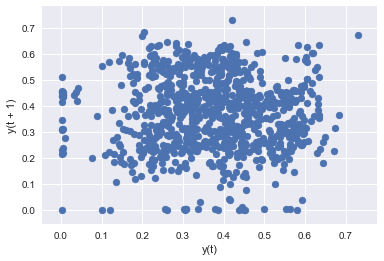

In [71]:
#Lag plot for calorie ratio

lag_plot(total_calories_weight['Ratio'])
plt.show()

Autocorrelation for Excess Calories 

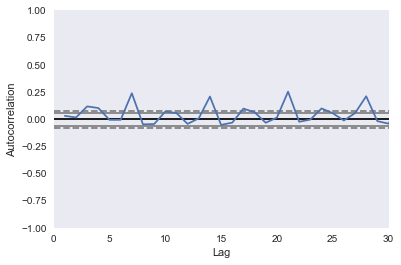

In [72]:

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(total_calories_weight['Ratio'])
plt.xlim(0,30)
plt.show()

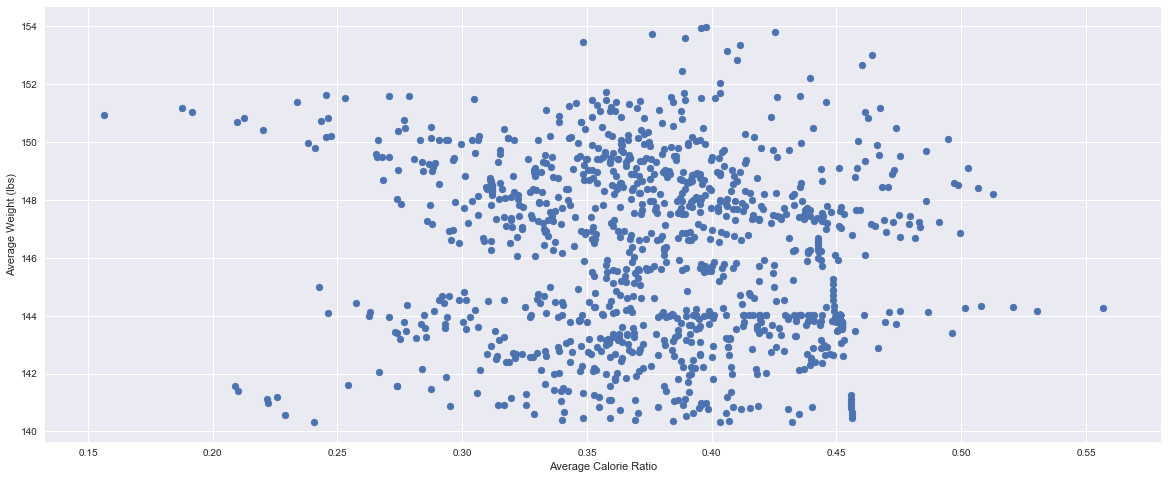

In [73]:
plt.figure(1,figsize=(20,8))
plt.xlabel('Average Calorie Ratio')
plt.ylabel('Average Weight (lbs)')
plt.scatter(total_calories_weight['Rolling Avg Ratio'],total_calories_weight['Rolling Avg Weight'])

Plots for Excess Calories together with Weight over Time 

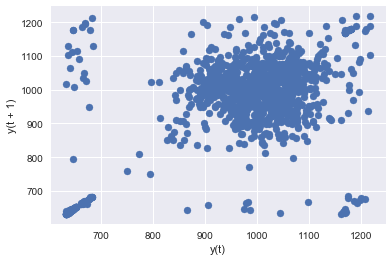

In [75]:
#Lag plot for Excess calories 

lag_plot(total_calories_weight['Excess'])
plt.show()

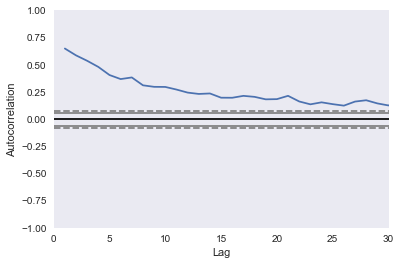

In [76]:
#Autocorrelation for Excess Calories 
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(total_calories_weight['Excess'])
plt.xlim(0,30)
plt.show()

In [77]:
total_calories_weight['Rolling Avg Excess'] = total_calories_weight['Excess'].rolling(window=14).mean()
total_calories_weight['Rolling Avg Weight'] = total_calories_weight['weight'].rolling(window=14).mean()

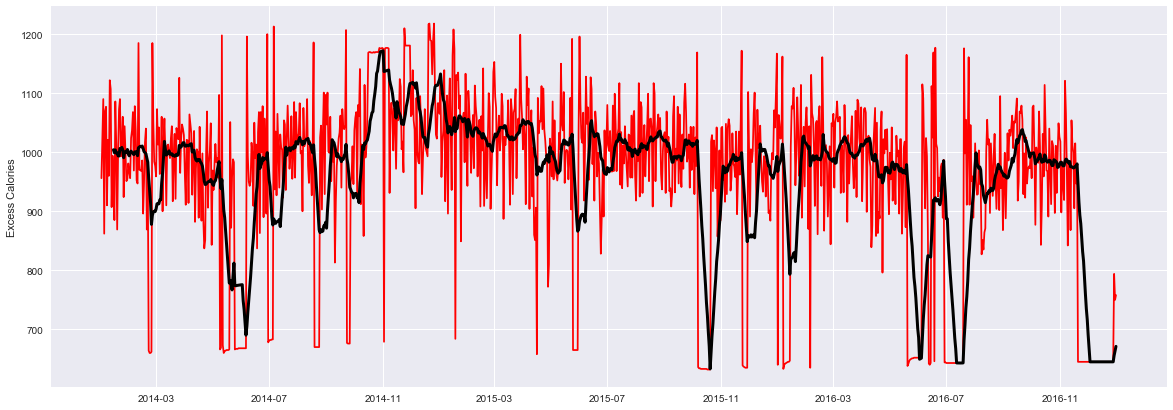

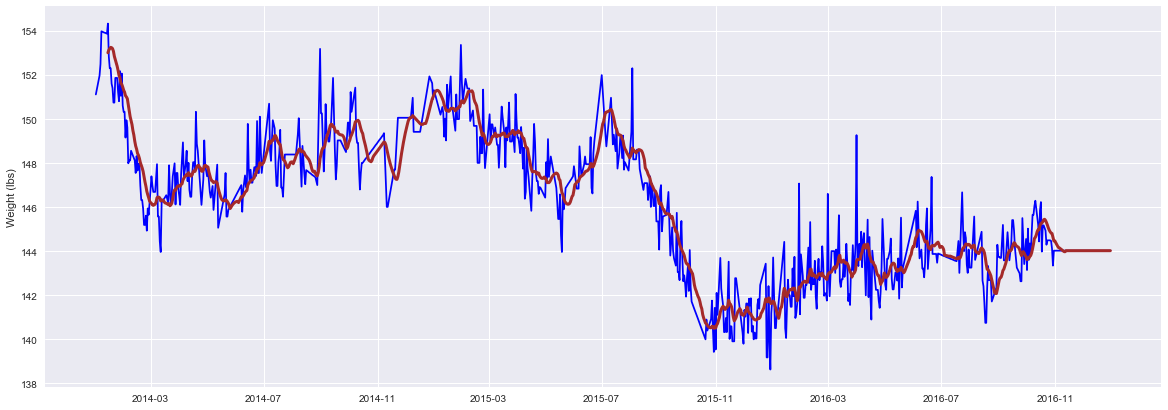

In [78]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(total_calories_weight.index,total_calories_weight['Excess'],'r')
plot2 = ax1.plot(total_calories_weight.index,total_calories_weight['Rolling Avg Excess'], 'black',linewidth=3.0)
plt.ylabel('Excess Calories')
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(total_calories_weight.index,total_calories_weight['weight'],'b')
plot4 = ax2.plot(total_calories_weight.index,total_calories_weight['Rolling Avg Weight'], 'brown',linewidth=3.0)
plt.ylabel('Weight (lbs)')

In [79]:
len(total_calories_weight)

1096

Plot of Weight versus Calories. Shows some correlation, stronger than the other variables 
There are some outliers present to the right, probably bad data where activity calories were not recorded (middle of 2014)
anything about 1300 seems suspicious....

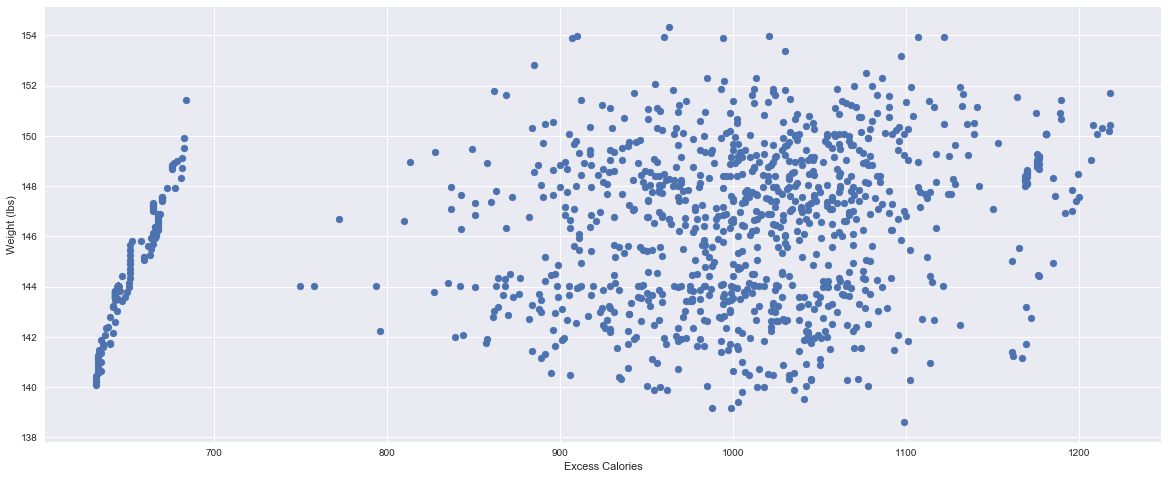

In [80]:


plt.figure(1,figsize=(20,8))
plt.xlabel('Excess Calories')
plt.ylabel('Weight (lbs)')
plt.scatter(total_calories_weight['Excess'],total_calories_weight['weight'])
plt.savefig('WeightvExcess_s2.png')
#plt.xlim(800,1200)
plt.show()


# Following Subject 1 analysis, we construct a linear model involving weight, total activity, excess calories, along with a linear trend

In [81]:
total_calories_weight['time index'] = range(1096)

In [82]:
total_calories_weight_new = total_calories_weight[['Excess','time index','weight']]

In [83]:
calories_weight_active = pd.concat([total_calories_weight_new,df_weight_active['Total_minutes']],axis=1)


In [84]:
calories_weight_active = calories_weight_active.dropna()

In [85]:
Y1 = calories_weight_active['weight']
X1 = calories_weight_active[['Excess','time index','Total_minutes']]
X1 = sm.add_constant(X1)

model_1_reg= sm.OLS(Y1,X1)
results_1_reg  = model_1_reg.fit()

results_1_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     360.5
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          1.33e-153
Time:                        14:49:36   Log-Likelihood:                -1972.7
No. Observations:                 902   AIC:                             3953.
Df Residuals:                     898   BIC:                             3973.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            97.3669      4.157     23.423      0.000      89.208     105.525
Excess            0.0436      0.003     12.694      0.000       0.037       0.050
time index       -0.0052      0.000    -18.713      0.000      -0.006      -0.005
Total_minutes     0.0357      0.003     12.342      0.000       0.030       0.041
==============================================================================
Omnibus:                      272.284   Durbin-Watson:                   0.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2840.604
Skew:                           1.061   Prob(JB):                         0.00
Kurtosis:                      11.431   Cond. No.                     6.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Residuals are not normal, iid. Have a time series structure of their own that we must account for

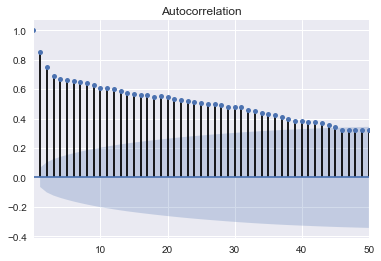

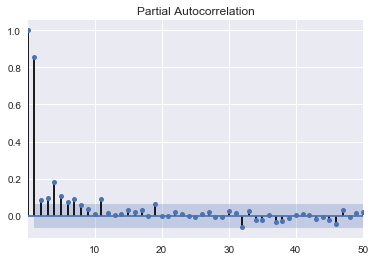

In [87]:
resid_1_reg = results_1_reg.resid

plot_acf(resid_1_reg, lags=50)
plt.xlim(0.1,50)
plt.savefig('resid_acf_s2.png')
plot_pacf(resid_1_reg, lags=50)
plt.xlim(0.1,50)
plt.savefig('resid_pcf_s2.png')
plt.show()

In [88]:
diff_of_resid = resid_1_reg.diff()

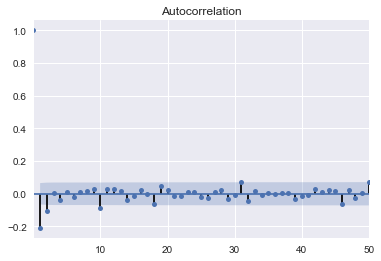

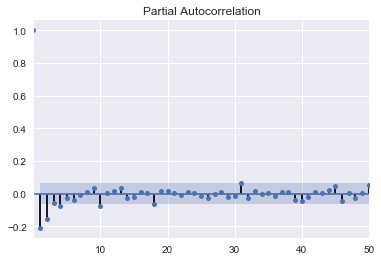

In [89]:
plot_acf(diff_of_resid.loc['01-02-2014':], lags=50)
plt.xlim(0.1,50)
plot_pacf(diff_of_resid.loc['01-02-2014':], lags=50)
plt.xlim(0.1,50)
plt.show()

ARIMA model for the OLS residuals


In [90]:
from statsmodels.tsa.arima_model import ARMA
OLS_resid_mod = ARMA(diff_of_resid.loc['01-02-2014':], (0,1)).fit()
print(OLS_resid_mod.params)

const      0.016507
ma.L1.y   -0.290607
dtype: float64


In [92]:
resid01 = OLS_resid_mod.resid
stats.normaltest(resid01)

NormaltestResult(statistic=681.85855473715696, pvalue=8.6356716213224137e-149)

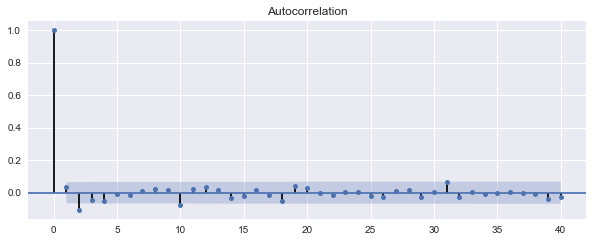

In [93]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid01.values.squeeze(), lags=40, ax=ax1)
plt.savefig('resid_acf_2_s2.png')

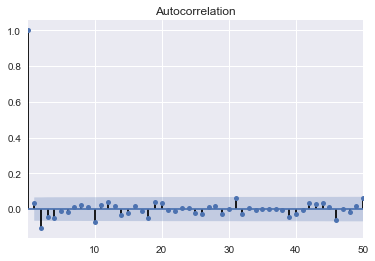

In [95]:
plot_acf(resid01.values.squeeze(), lags=50)
plt.xlim(0.1,50)
plt.savefig('resid_acf_2_s2.png')

In [54]:
for i in range(-7,8,1):
    print('shift day:', i, total_calories_weight['Rolling Avg Weight'].corr(total_calories_weight['Rolling Avg Excess'].shift(i)))

shift day: -7 0.14318082838
shift day: -6 0.144232948749
shift day: -5 0.146000914935
shift day: -4 0.148451484734
shift day: -3 0.151312937971
shift day: -2 0.154542346054
shift day: -1 0.157711764797
shift day: 0 0.160962206157
shift day: 1 0.166547706295
shift day: 2 0.171722836734
shift day: 3 0.176436898799
shift day: 4 0.180622719255
shift day: 5 0.18437248956
shift day: 6 0.187827225835
shift day: 7 0.191031321489


# Study the possible relationship between Excess calories and Weight time series: Use various ARIMA models

Excess calories as the x variable and weight as the y 

Take first differences of Excess Calories to "difference" the variables. Variables look stationary. 

In [54]:


total_calories_weight['Diff Excess'] = total_calories_weight['Excess'].diff()
total_calories_weight['Diff Weight'] = total_calories_weight['weight'].diff()

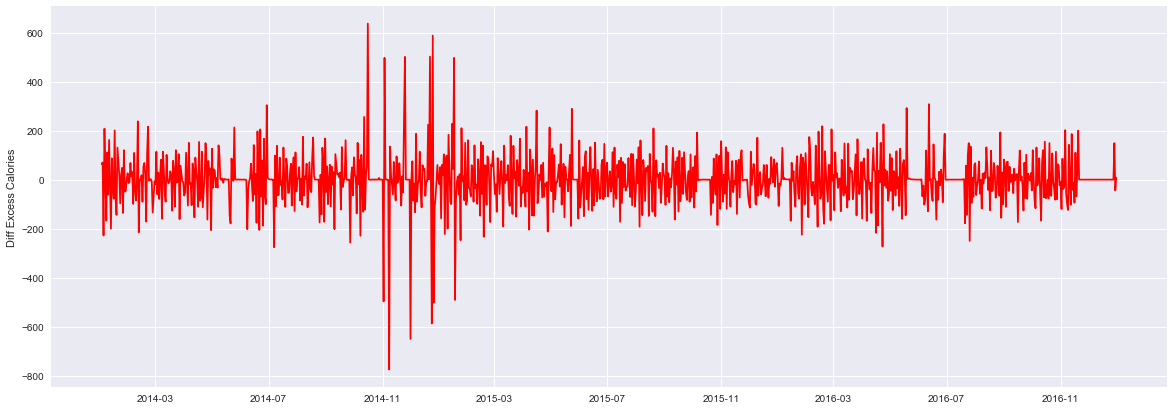

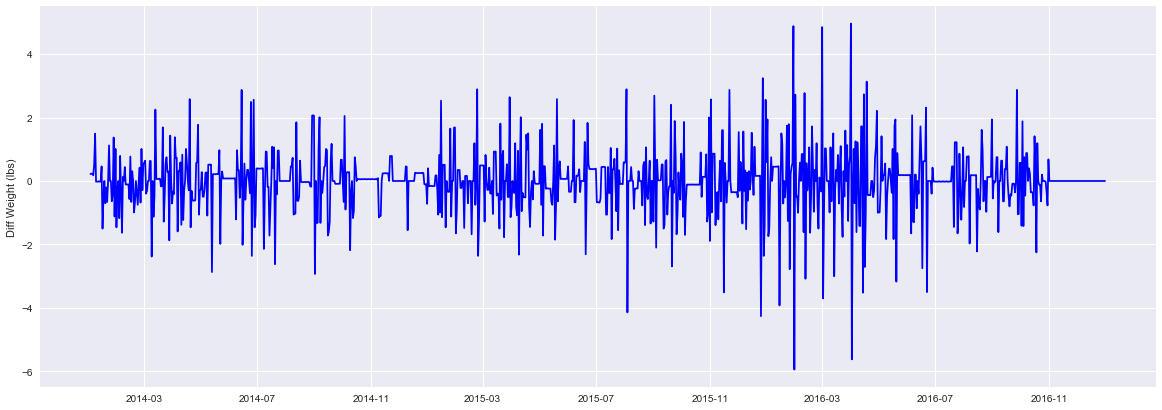

In [55]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(total_calories_weight.index,total_calories_weight['Diff Excess'],'r')
plt.ylabel('Diff Excess Calories')
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(total_calories_weight.index,total_calories_weight['Diff Weight'],'b')
plt.ylabel('Diff Weight (lbs)')

In [56]:
total_calories_weight['Diff Weight'].head()

date
2014-01-01     NaN
2014-01-02    0.22
2014-01-03    0.23
2014-01-04    0.23
2014-01-05    0.18
Freq: D, Name: Diff Weight, dtype: float64

In [57]:
from statsmodels.tsa.stattools import adfuller
test_diff_weight = adfuller(total_calories_weight['Diff Weight'].loc['2014-01-02':])
print('ADF Statistic Diff Weight: %f' % test_diff_weight[0])
print('p-value Diff Weight: %f' % test_diff_weight[1]) 

ADF Statistic Diff Weight: -12.325412
p-value Diff Weight: 0.000000


Autocorrelation and PACF plots for the Differences of Excess. Potentitall a seasonal type of pattern, but hard to tell for sure

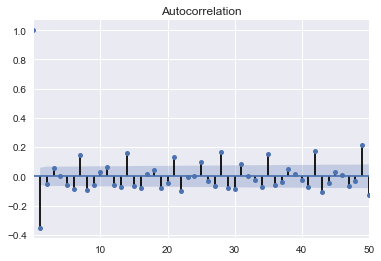

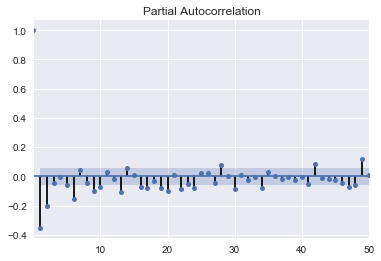

In [59]:
plot_acf(total_calories_weight['Diff Excess'].loc['2014-01-02':], lags=50)
plt.xlim(0.1,50)
plt.savefig('correlation1_s2.png')
plot_pacf(total_calories_weight['Diff Excess'].loc['2014-01-02':], lags=50)
plt.xlim(0.1,50)
plt.savefig('correlation2_s2.png')
plt.show()

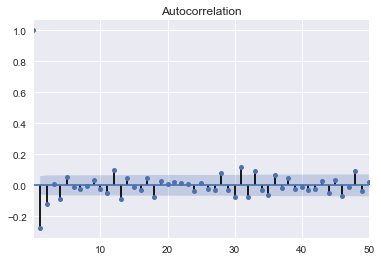

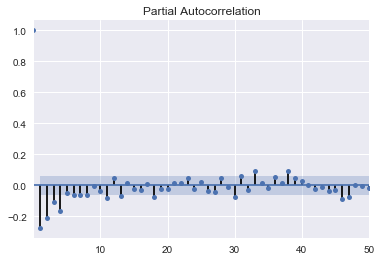

In [62]:
#Autocorrelation and PACF plots for the Differences of Weight
plot_acf(total_calories_weight['Diff Weight'].loc['2014-01-02':], lags=50)
plt.xlim(0.1,50)
#plt.ylim(-0.5,0.2)
plot_pacf(total_calories_weight['Diff Weight'].loc['2014-01-02':], lags=50)
plt.xlim(0.1,50)
plt.show()

In [63]:
arma_mod_guess = sm.tsa.ARIMA(total_calories_weight['weight'], (0,1,1)).fit()
print(arma_mod_guess.params)

const            -0.006688
ma.L1.D.weight   -0.466771
dtype: float64


In [63]:
print(arma_mod_guess.aic, arma_mod_guess.bic, arma_mod_guess.hqic)

2907.862293381949 2927.85633195 2915.42787113


In [64]:
sm.stats.durbin_watson(arma_mod_guess.resid.values)

2.006139933997046

In [65]:
resid_guess = arma_mod_guess.resid
stats.normaltest(resid_guess)

NormaltestResult(statistic=132.98333564543833, pvalue=1.3275031859695737e-29)

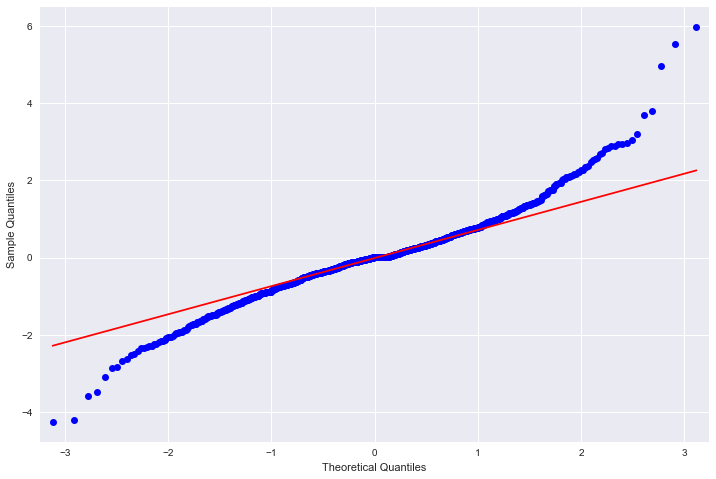

In [66]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid_guess, line='q', ax=ax, fit=True)

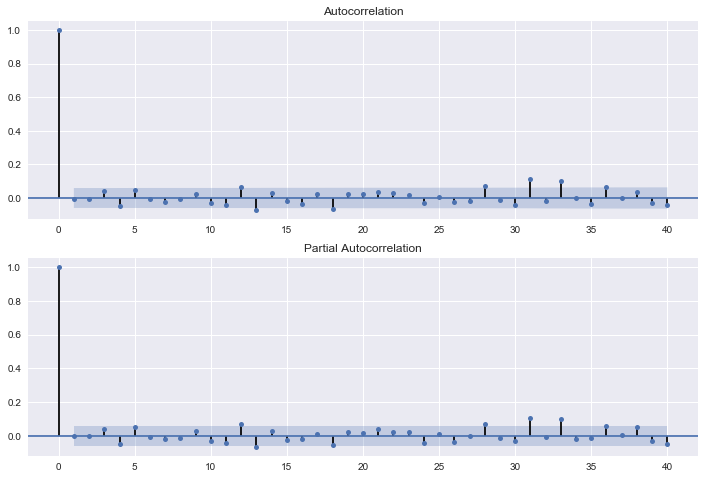

In [67]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid_guess.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid_guess, lags=40, ax=ax2)

In [68]:
r,q,p = sm.tsa.acf(resid_guess.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.003102   0.010568  0.918122
2.0  -0.003242   0.022118  0.989002
3.0   0.041084   1.878846  0.597929
4.0  -0.048574   4.476673  0.345322
5.0   0.048955   7.117815  0.212025
6.0  -0.004353   7.138713  0.308209
7.0  -0.023878   7.768223  0.353475
8.0  -0.008210   7.842710  0.448984
9.0   0.021161   8.338026  0.500473
10.0 -0.027092   9.150593  0.517874
11.0 -0.040844  10.999188  0.443331
12.0  0.067911  16.114516  0.186047
13.0 -0.069170  21.426164  0.064916
14.0  0.026985  22.235355  0.073906
15.0 -0.018577  22.619209  0.092566
16.0 -0.035221  24.000212  0.089500
17.0  0.026197  24.764916  0.100097
18.0 -0.064552  29.412445  0.043566
19.0  0.022961  30.000986  0.051786
20.0  0.022527  30.568038  0.061158
21.0  0.035474  31.975517  0.058885
22.0  0.026902  32.785732  0.064952
23.0  0.015822  33.066228  0.079920
24.0 -0.027866  33.937178  0.085792
25.0  0.003927  33.954487  0.108884
26.0 -0.022602  34.528500  0

# Here we will perform a GridSearch and train/test split. We find to find the choice of the ARIMA model parameters that is the best fit of the data 

In [60]:
import sklearn.metrics 

In [61]:
X = total_calories_weight['weight'].values

In [62]:
size = int(len(X)*0.66)

In [72]:
train, test = X[:size], X[size:]

In [73]:
history = [x for x in train]

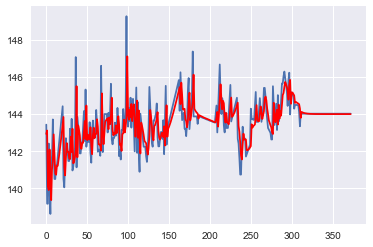

In [74]:
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [75]:
print("Mean Absolute Error:", sklearn.metrics.mean_absolute_error(test, predictions))
print('MSE:', sklearn.metrics.mean_squared_error(test, predictions))
print("R^2:", sklearn.metrics.r2_score(test, predictions))

Mean Absolute Error: 0.67978806631
MSE: 1.11137064494
R^2: 0.322033752264


In [76]:
X

array([ 151.12,  151.34,  151.57, ...,  144.02,  144.02,  144.02])

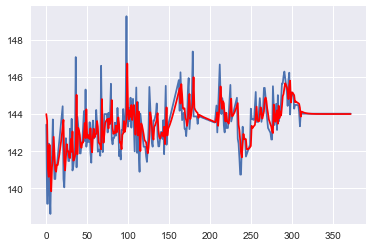

In [77]:
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [78]:
print("Mean Absolute Error:", sklearn.metrics.mean_absolute_error(test, predictions))
print('MSE:', sklearn.metrics.mean_squared_error(test, predictions))
print("R^2:", sklearn.metrics.r2_score(test, predictions))

Mean Absolute Error: 0.680082417523
MSE: 1.09409115595
R^2: 0.332574709386


In [63]:
def evaluate_arima_model(data, arima_order):
    size = int(len(data)*0.66)
    train, test = data[:size], data[size:]
    history = [x for x in train]
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    return sklearn.metrics.mean_absolute_error(test, predictions)

In [64]:
def evaluate_models(data, p_values, d_values, q_values):
    #data = data.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mae = evaluate_arima_model(data, order)
                    if mae < best_score:
                        best_score, best_cfg = mae, order
                    print('ARIMA%s MAE=%.3f' % (order,mae))
                except:
                    continue
    print('Best ARIMA%s MAE=%.3f' % (best_cfg, best_score))

In [66]:
import warnings
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(1,2)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(X, p_values, d_values, q_values)

ARIMA(0, 1, 0) MAE=0.706
ARIMA(0, 1, 1) MAE=0.695
ARIMA(0, 1, 2) MAE=0.678
ARIMA(1, 1, 0) MAE=0.706
ARIMA(1, 1, 1) MAE=0.680
ARIMA(1, 1, 2) MAE=0.681
ARIMA(2, 1, 0) MAE=0.689
ARIMA(2, 1, 1) MAE=0.681
ARIMA(2, 1, 2) MAE=0.679
ARIMA(4, 1, 0) MAE=0.682
ARIMA(4, 1, 1) MAE=0.681
ARIMA(4, 1, 2) MAE=0.680
ARIMA(6, 1, 0) MAE=0.680
ARIMA(6, 1, 1) MAE=0.680
ARIMA(8, 1, 0) MAE=0.680
ARIMA(8, 1, 1) MAE=0.682
ARIMA(10, 1, 0) MAE=0.682
ARIMA(10, 1, 1) MAE=0.681
Best ARIMA(0, 1, 2) MAE=0.678


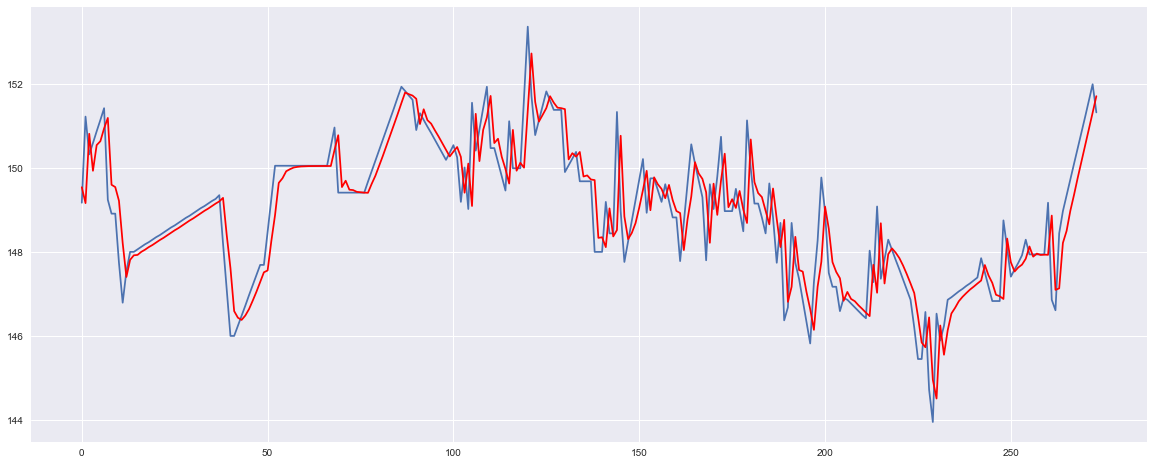

In [69]:
X = total_calories_weight['weight'].values
size = int(len(X)*0.25)
train, test = X[:size], X[size:2*size]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
plt.figure(1,figsize=(20,8))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [70]:
 print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  546
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -655.388
Method:                       css-mle   S.D. of innovations              0.804
Date:                Tue, 30 Jan 2018   AIC                           1318.775
Time:                        19:05:57   BIC                           1335.986
Sample:                             1   HQIC                          1325.503
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.020      0.017      0.987      -0.038       0.039
ma.L1.D.y     -0.2300      0.042     -5.440      0.000      -0.313      -0.147
ma.L2.D.y     -0.1969      0.045     -4.373      0.0

In [71]:
print("Mean Absolute Error:", sklearn.metrics.mean_absolute_error(test, predictions))
print('MSE:', sklearn.metrics.mean_squared_error(test, predictions))
print("R^2:", sklearn.metrics.r2_score(test, predictions))

Mean Absolute Error: 0.534875796425
MSE: 0.582500780278
R^2: 0.775942815852


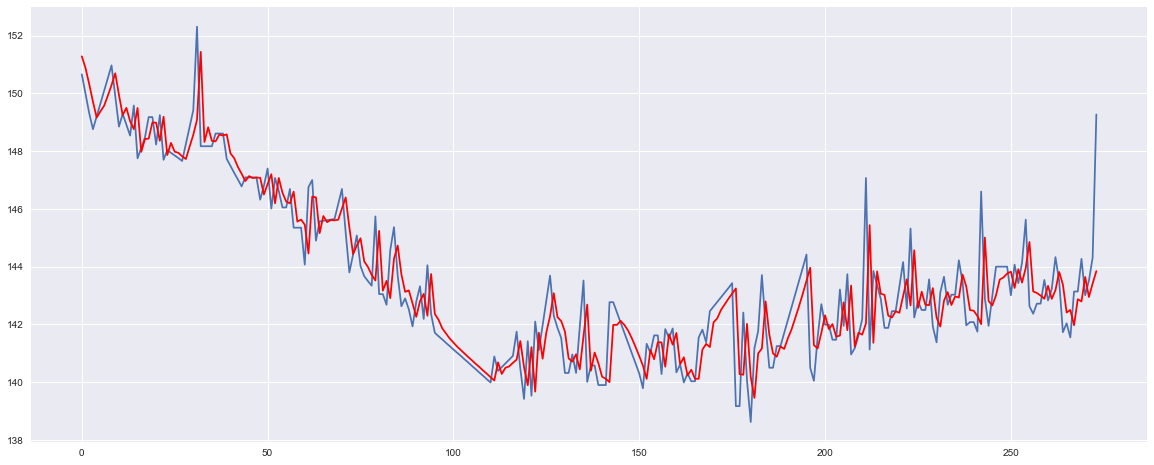

In [73]:
train1, test1 = X[:2*size], X[2*size:3*size]
history = [x for x in train1]
predictions1 = []
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,2))
    model_fit1 = model.fit()
    output = model_fit1.forecast()
    yhat = output[0]
    predictions1.append(yhat)
    obs = test1[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
plt.figure(1,figsize=(20,8))
plt.plot(test1)
plt.plot(predictions1, color='red')
plt.show()

In [74]:
print(model_fit1.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  820
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1098.059
Method:                       css-mle   S.D. of innovations              0.923
Date:                Tue, 30 Jan 2018   AIC                           2204.117
Time:                        19:37:50   BIC                           2222.954
Sample:                             1   HQIC                          2211.345
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0097      0.014     -0.718      0.473      -0.036       0.017
ma.L1.D.y     -0.3832      0.034    -11.211      0.000      -0.450      -0.316
ma.L2.D.y     -0.1979      0.037     -5.360      0.0

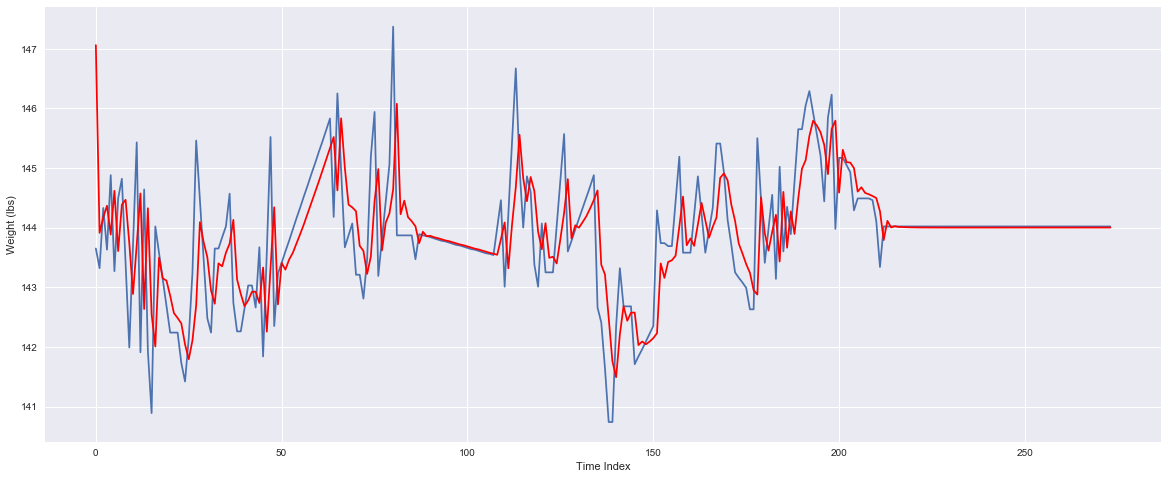

In [77]:
train2, test2 = X[:3*size], X[3*size:]
history = [x for x in train2]
predictions2 = []
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,2))
    model_fit2 = model.fit()
    output = model_fit2.forecast()
    yhat = output[0]
    predictions2.append(yhat)
    obs = test2[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
plt.figure(1,figsize=(20,8))
plt.plot(test2)
plt.plot(predictions2, color='red')
plt.ylabel('Weight (lbs)')
plt.xlabel('Time Index')
plt.savefig('ARIMA_1_s2.png')
plt.show()

In [78]:
print(model_fit2.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1094
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1452.661
Method:                       css-mle   S.D. of innovations              0.913
Date:                Tue, 30 Jan 2018   AIC                           2913.322
Time:                        19:40:19   BIC                           2933.312
Sample:                             1   HQIC                          2920.887
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0070      0.011     -0.660      0.509      -0.028       0.014
ma.L1.D.y     -0.4061      0.030    -13.727      0.000      -0.464      -0.348
ma.L2.D.y     -0.2077      0.032     -6.536      0.0

# Sleep minutes and Weight Data

In [35]:
sleep_min_2014 = pd.DataFrame(fit_data_0['sleep-minutes']['2014']['sleep-minutesAsleep'])
sleep_min_2014['dateTime'] = pd.to_datetime(sleep_min_2014['dateTime'])
sleep_min_2014.columns = ['date','Sleep_Minutes']
sleep_min_2015 = pd.DataFrame(fit_data_0['sleep-minutes']['2015']['sleep-minutesAsleep'])
sleep_min_2015['dateTime'] = pd.to_datetime(sleep_min_2015['dateTime'])
sleep_min_2015.columns = ['date','Sleep_Minutes']
sleep_min_2016 = pd.DataFrame(fit_data_0['sleep-minutes']['2016']['sleep-minutesAsleep'])
sleep_min_2016['dateTime'] = pd.to_datetime(sleep_min_2016['dateTime'])
sleep_min_2016.columns = ['date','Sleep_Minutes']
sleep_min_2017 = pd.DataFrame(fit_data_0['sleep-minutes']['2017']['sleep-minutesAsleep'])
sleep_min_2017['dateTime'] = pd.to_datetime(sleep_min_2017['dateTime'])
sleep_min_2017.columns = ['date','Sleep_Minutes']

In [36]:
sleep_min_total = pd.concat([sleep_min_2014,sleep_min_2015,sleep_min_2016,sleep_min_2017])
sleep_min_total = sleep_min_total.reset_index(drop=True)
sleep_min_total_red = sleep_min_total[:123]
sleep_min_total_red_date = sleep_min_total_red.set_index('date')

In [37]:
df_weight_sleep = pd.concat([sleep_min_total_red_date,df_weight_red_date],axis=1)
df_weight_sleep = df_weight_sleep.dropna()

In [38]:
df_weight_sleep['Rolling Avg Sleep'] = df_weight_sleep['Sleep_Minutes'].rolling(window=7).mean()
df_weight_sleep['Rolling Avg Weight'] = df_weight_sleep['weight'].rolling(window=7).mean()

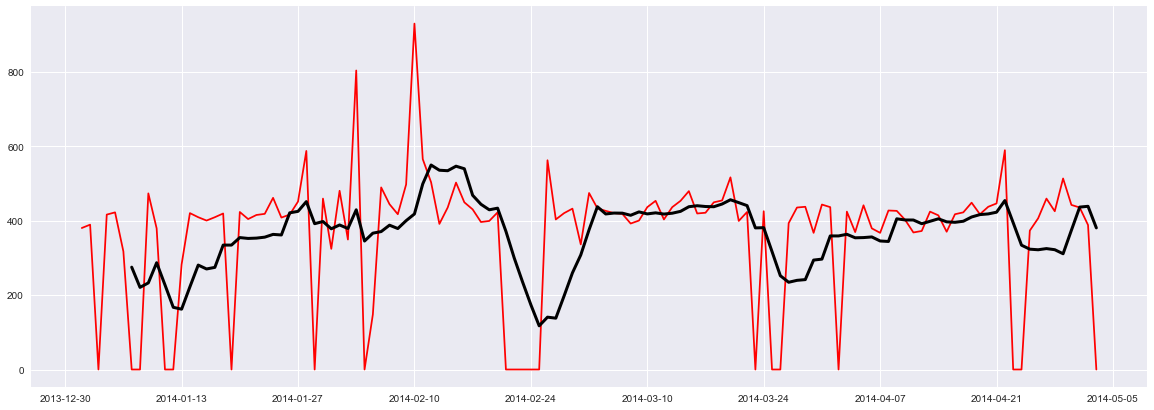

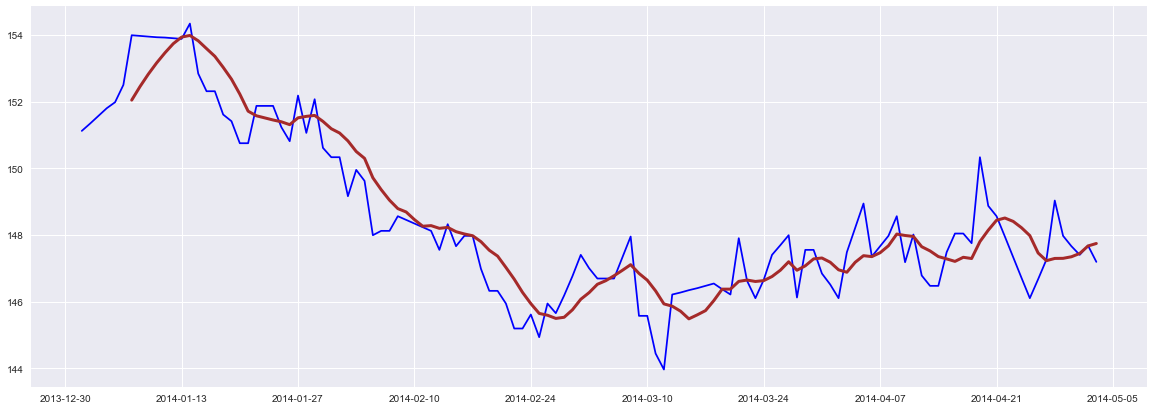

In [39]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(df_weight_sleep.index,df_weight_sleep['Sleep_Minutes'],'r')
plot2 = ax1.plot(df_weight_sleep.index,df_weight_sleep['Rolling Avg Sleep'], 'black',linewidth=3.0)
#plt.ylim(0,350)
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(df_weight_sleep.index,df_weight_sleep['weight'],'b')
plot4 = ax2.plot(df_weight_sleep.index,df_weight_sleep['Rolling Avg Weight'], 'brown',linewidth=3.0)

# Also consider sleep efficiency data 

In [40]:
sleep_eff_2014 = pd.DataFrame(fit_data_0['sleep-efficiency']['2014']['sleep-efficiency'])
sleep_eff_2014['dateTime'] = pd.to_datetime(sleep_eff_2014['dateTime'])
sleep_eff_2014.columns = ['date','sleep_eff']

In [41]:
sleep_eff_total = sleep_eff_2014[:123]
sleep_eff_total = sleep_eff_total.set_index('date')

In [42]:
df_weight_sleep_eff = pd.concat([sleep_eff_total,df_weight_red_date],axis=1)
df_weight_sleep_eff = df_weight_sleep_eff.dropna()

In [43]:
df_weight_sleep_eff['Rolling Avg Sleep Eff'] = df_weight_sleep_eff['sleep_eff'].rolling(window=7).mean()
df_weight_sleep_eff['Rolling Avg Weight'] = df_weight_sleep_eff['weight'].rolling(window=7).mean()

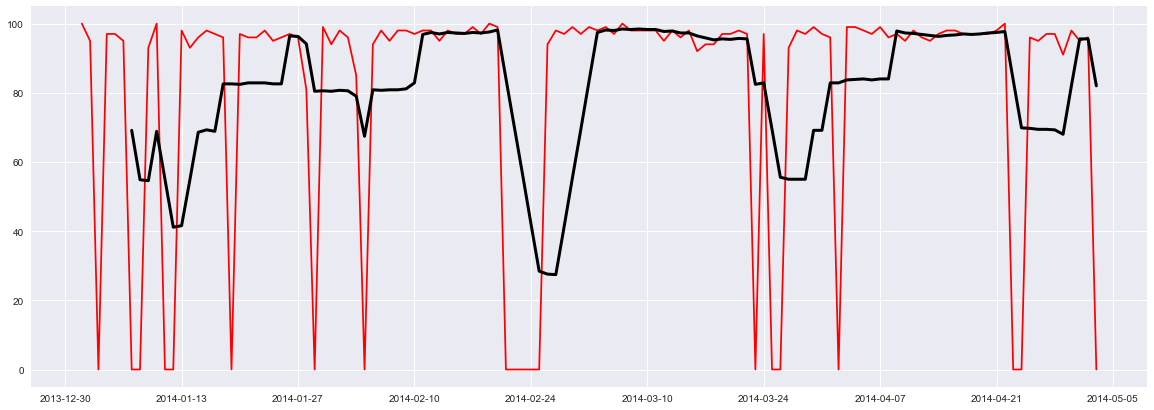

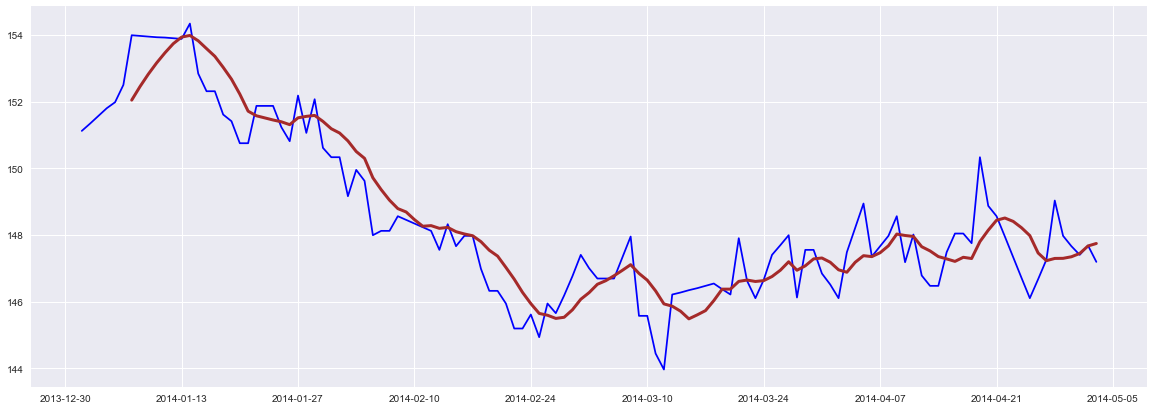

In [44]:
fig1, ax1 = plt.subplots(figsize=(20,7))
plot1 = ax1.plot(df_weight_sleep_eff.index,df_weight_sleep_eff['sleep_eff'],'r')
plot2 = ax1.plot(df_weight_sleep_eff.index,df_weight_sleep_eff['Rolling Avg Sleep Eff'], 'black',linewidth=3.0)
#plt.ylim(0,350)
fig2, ax2 = plt.subplots(figsize=(20,7))
plot3 = ax2.plot(df_weight_sleep_eff.index,df_weight_sleep_eff['weight'],'b')
plot4 = ax2.plot(df_weight_sleep_eff.index,df_weight_sleep_eff['Rolling Avg Weight'], 'brown',linewidth=3.0)

# OLD MATERIAL #

In [21]:
df_weight_fat = df_weight['fat'].dropna()


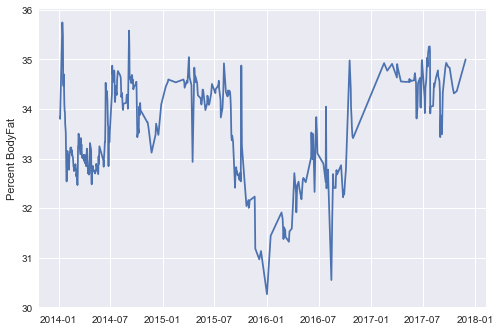

In [22]:
plt.plot(df_weight_fat.index,df_weight_fat)
plt.ylabel('Percent BodyFat')
plt.show()

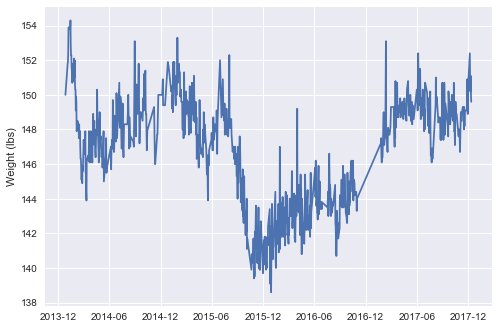

In [58]:
plt.plot(df_weight.index,df_weight['weight'])
plt.ylabel('Weight (lbs)')
#plt.xlim('2015-05-01', '2015-12-10')
plt.show()

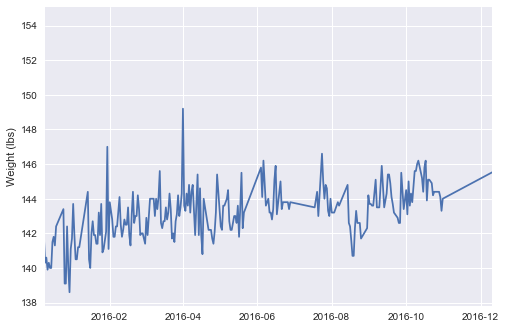

In [24]:
plt.plot(df_weight.index,df_weight['weight'])
plt.ylabel('Weight (lbs)')
plt.xlim('2015-12-10', '2016-12-10')
plt.show()

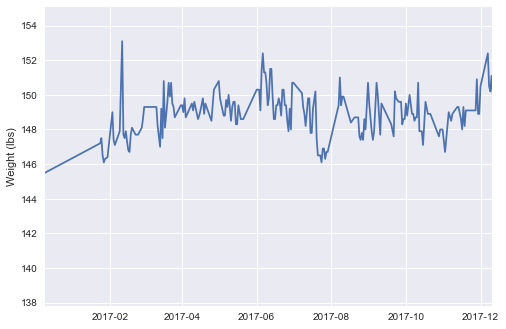

In [25]:
plt.plot(df_weight.index,df_weight['weight'])
plt.ylabel('Weight (lbs)')
plt.xlim('2016-12-10', '2017-12-10')
plt.show()

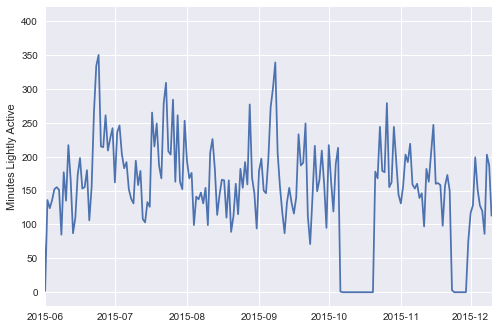

In [26]:
plt.plot(min_light_active.index,min_light_active['light_minutes'])
plt.xlim('2015-06-01', '2015-12-10')
plt.ylabel('Minutes Lightly Active')
plt.show()

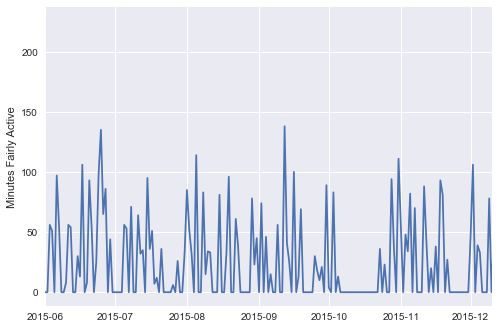

In [27]:
plt.plot(min_fairly_active.index,min_fairly_active['fair_minutes'])
plt.xlim('2015-06-01', '2015-12-10')
plt.ylabel('Minutes Fairly Active')
plt.show()

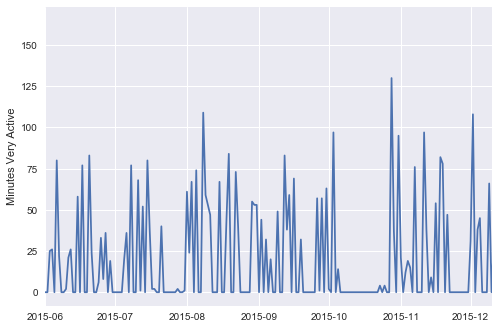

In [28]:
plt.plot(min_very_active.index,min_very_active['very_minutes'])
plt.ylabel('Minutes Very Active')
plt.xlim('2015-06-01', '2015-12-10')
plt.show()

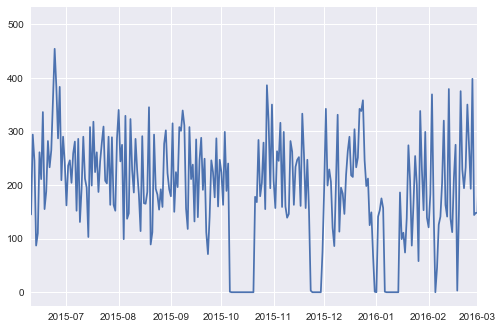

In [30]:
plt.plot(min_active_total.index,min_active_total['Total_minutes'])
plt.xlim('2015-06-10', '2016-03-01')
plt.show()

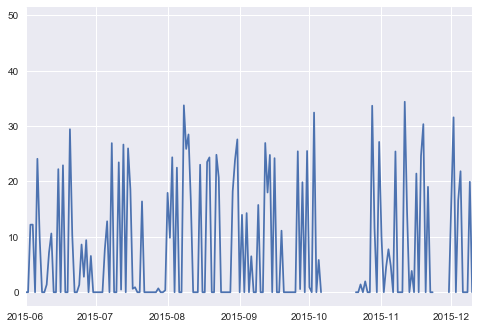

In [31]:
plt.plot(min_active_total.index,min_active_total['Percent Very Active'])
plt.xlim('2015-06-01', '2015-12-10')
plt.show()

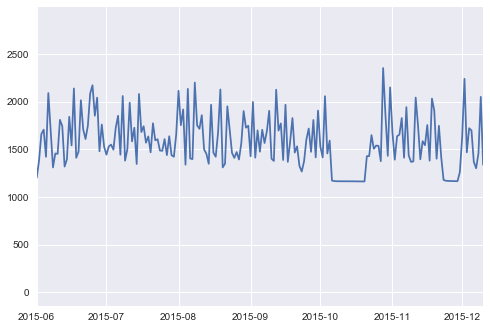

In [32]:
plt.plot(tracker_calories['date'],tracker_calories['Tracker_Calories'])
plt.xlim('2015-06-01', '2015-12-10')
plt.show()

In [40]:
tracker_steps_2014 = pd.DataFrame(fit_data_0['tracker-steps']['2014']['activities-tracker-steps'])
tracker_steps_2014['dateTime'] = pd.to_datetime(tracker_steps_2014['dateTime'])
tracker_steps_2014.columns = ['date','tracker-steps']
tracker_steps_2015 = pd.DataFrame(fit_data_0['tracker-steps']['2015']['activities-tracker-steps'])
tracker_steps_2015['dateTime'] = pd.to_datetime(tracker_steps_2015['dateTime'])
tracker_steps_2015.columns = ['date','tracker-steps']
tracker_steps_2016 = pd.DataFrame(fit_data_0['tracker-steps']['2016']['activities-tracker-steps'])
tracker_steps_2016['dateTime'] = pd.to_datetime(tracker_steps_2016['dateTime'])
tracker_steps_2016.columns = ['date','tracker-steps']
tracker_steps_2017 = pd.DataFrame(fit_data_0['tracker-steps']['2017']['activities-tracker-steps'])
tracker_steps_2017['dateTime'] = pd.to_datetime(tracker_steps_2017['dateTime'])
tracker_steps_2017.columns = ['date','tracker-steps']

In [41]:
tracker_steps = pd.concat([tracker_steps_2014,tracker_steps_2015,tracker_steps_2016,tracker_steps_2017])
tracker_steps['tracker-steps'] = tracker_steps['tracker-steps'].astype(int)
tracker_steps = tracker_steps.set_index('date')

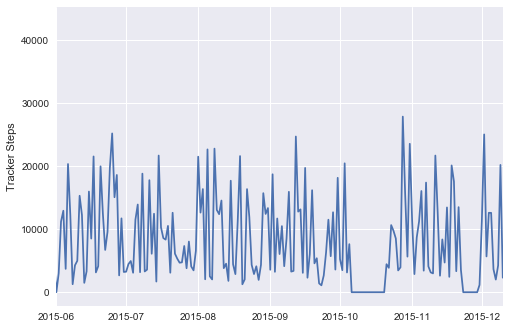

In [42]:
plt.plot(tracker_steps.index,tracker_steps['tracker-steps'])
plt.xlim('2015-06-01', '2015-12-10')
plt.ylabel('Tracker Steps')
plt.show()

In [43]:
tracker_floors_2014 = pd.DataFrame(fit_data_0['tracker-floors']['2014']['activities-tracker-floors'])
tracker_floors_2014['dateTime'] = pd.to_datetime(tracker_floors_2014['dateTime'])
tracker_floors_2014.columns = ['date','tracker-floors']
tracker_floors_2015 = pd.DataFrame(fit_data_0['tracker-floors']['2015']['activities-tracker-floors'])
tracker_floors_2015['dateTime'] = pd.to_datetime(tracker_floors_2015['dateTime'])
tracker_floors_2015.columns = ['date','tracker-floors']
tracker_floors_2016 = pd.DataFrame(fit_data_0['tracker-floors']['2016']['activities-tracker-floors'])
tracker_floors_2016['dateTime'] = pd.to_datetime(tracker_floors_2016['dateTime'])
tracker_floors_2016.columns = ['date','tracker-floors']
tracker_floors_2017 = pd.DataFrame(fit_data_0['tracker-floors']['2017']['activities-tracker-floors'])
tracker_floors_2017['dateTime'] = pd.to_datetime(tracker_floors_2017['dateTime'])
tracker_floors_2017.columns = ['date','tracker-floors']

In [44]:
tracker_floors = pd.concat([tracker_floors_2014,tracker_floors_2015,tracker_floors_2016,tracker_floors_2017])
tracker_floors['tracker-floors'] = tracker_floors['tracker-floors'].astype(int)
tracker_floors = tracker_floors.set_index('date')

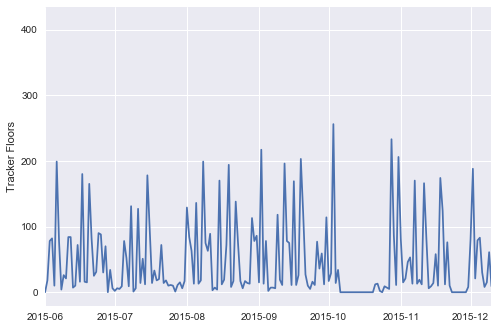

In [45]:
plt.plot(tracker_floors.index,tracker_floors['tracker-floors'])
plt.xlim('2015-06-01', '2015-12-10')
plt.ylabel('Tracker Floors')
plt.show()

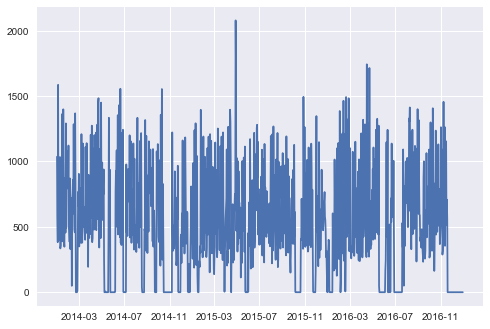

In [48]:
plt.plot(tracker_act_calories['date'],tracker_act_calories['tracker_act_calories'])
plt.show()

In [51]:
tracker_act_calories = tracker_act_calories.set_index('date')
tracker_calories = tracker_calories.set_index('date')

In [52]:
tracker_cal_tot = pd.concat([tracker_calories,tracker_act_calories], axis=1)

In [55]:
tracker_cal_tot['ratio'] = (tracker_cal_tot['tracker_act_calories']/tracker_cal_tot['Tracker_Calories'])*100


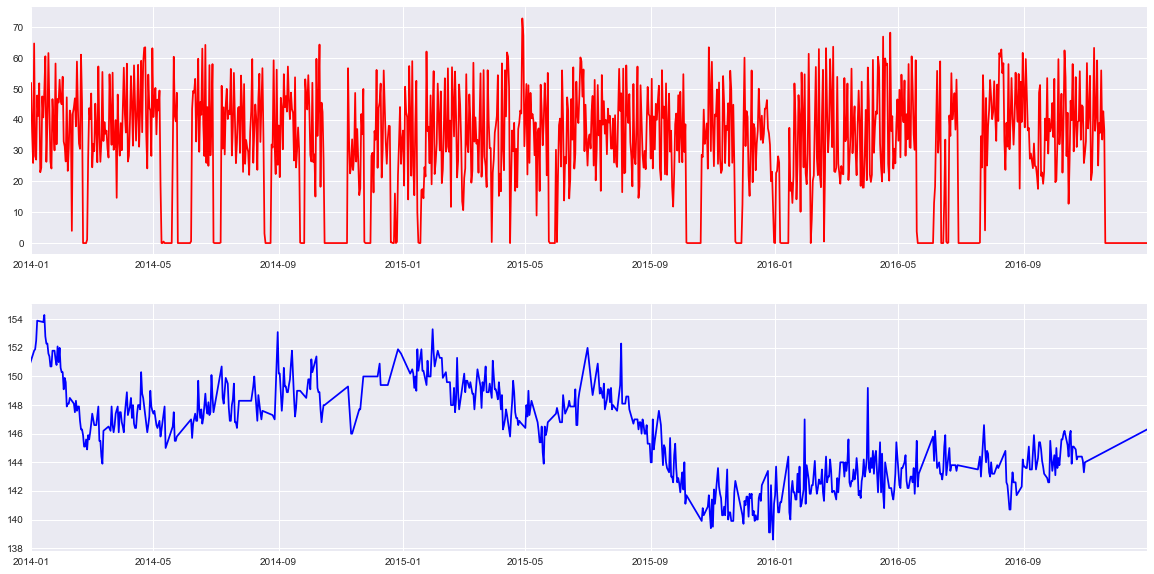

In [69]:
plt.figure(1, figsize=(20,10))
plt.subplot(211)
plt.plot(tracker_cal_tot.index,tracker_cal_tot['ratio'],'r')
plt.xlim('01-01-2014', '12-31-2016')
plt.subplot(212)
plt.plot(df_weight.index,df_weight['weight'], 'b')
plt.xlim('01-01-2014', '12-31-2016')
plt.show()

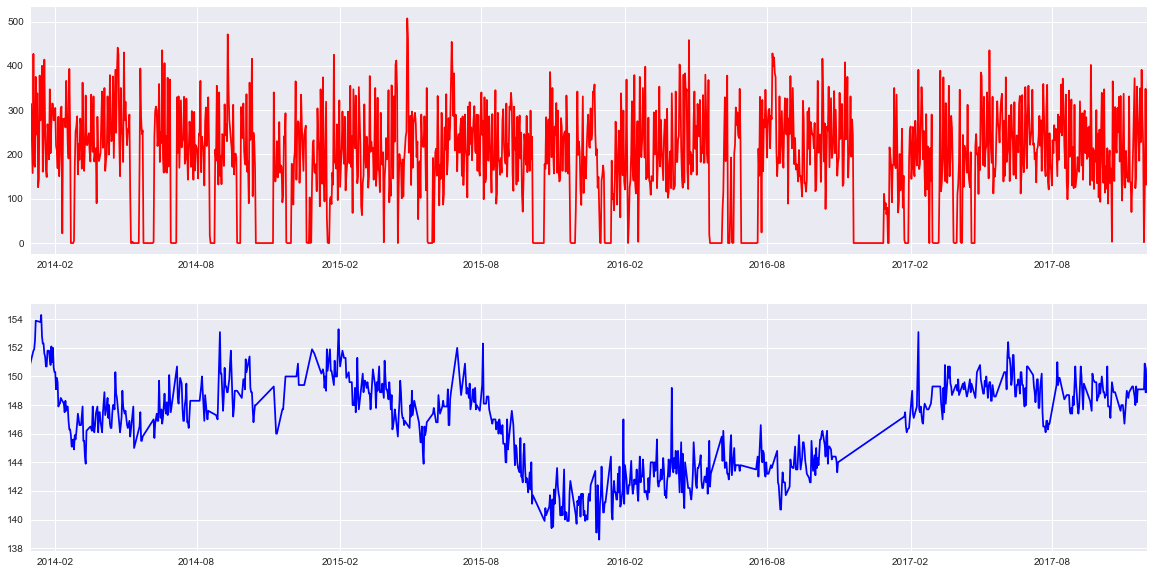

In [73]:
plt.figure(2, figsize=(20,10))
plt.subplot(211)
plt.plot(min_active_total.index,min_active_total['Total_minutes'],'r')
plt.xlim('01-01-2014', '12-01-2017')
plt.subplot(212)
plt.plot(df_weight.index,df_weight['weight'], 'b')
plt.xlim('01-01-2014', '12-01-2017')
plt.show()
